In [44]:
# import all libraries here

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

import joblib

In [45]:
# loading the complete and abridged dataframes

df = joblib.load('../data/jlib_files/dataframes/modelling_df_1_cleaning.jlib')
df_vis = joblib.load('../data/jlib_files/dataframes/complete_cleaned_df_1_cleaning.jlib')

To-Do List

EDA:

- histograms to show distribution of continuous variables
- pairplots for continuous data
- median price comparison for binary variables
- masked heatmap to check for co-correlation
- timeseries visualisations - off-topic but could be interesting as a result of Covid impact on 2020

Variable Transformation:

- look at distributions of continuous/discrete variables - do they need transforming?
- look in to log transforming the continuous variables (naive-Bayes lessons)

Modelling:

- review the use of NLP - could we instead look at key words within the variables? This might be a better option for the title variable
- can we use neural networks?

good visualisations: https://towardsdatascience.com/predicting-airbnb-prices-with-deep-learning-part-2-how-to-improve-your-nightly-price-50ea8bc2bd29

# Exploratory Data Analysis

### Histogram distributions of quantitative variables 

In [48]:
list(df_vis.columns)

['id',
 'listing_url',
 'name',
 'description',
 'neighborhood_overview',
 'host_id',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_has_profile_pic',
 'host_identity_verified',
 'neighbourhood',
 'latitude',
 'longitude',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'amenities',
 'price',
 'instant_bookable',
 'calculated_host_listings_count',
 'property_type_basic',
 'air_conditioning',
 'bbq',
 'baby_facilities',
 'balcony_or_patio',
 'bath',
 'bed_linen',
 'cable_tv',
 'child_friendly',
 'coffee_maker',
 'cooking_facilities',
 'dishwasher',
 'fridge_freezer',
 'garden',
 'has_workspace',
 'host_greets_you',
 'long_term_stays',
 'luggage_dropoff',
 'lock_on_bedroom_door',
 'luxury_facilities',
 'private_entrance',
 'toiletries',
 'tumble_dryer',
 'tv',
 'distance_from_center',
 'nearest_station',
 'station_distance',
 'rail_network',
 'tfl_zone',
 'postcode',
 'mean_monthly_r

In [123]:
quantitative_variables = ['accommodates', 'bathrooms', 'beds', 'calculated_host_listings_count',
                         'distance_from_center', 'station_distance']

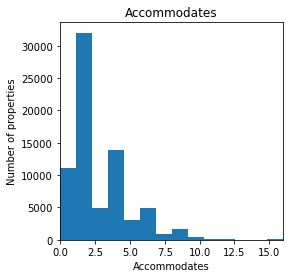

In [146]:
fig,ax = plt.subplots(figsize = (4,4))

ax.hist(df.accommodates, bins = 14)

ax.set_xlabel('Accommodates')
ax.set_ylabel('Number of properties')
ax.margins(x=0)

ax.set_title('Accommodates')

plt.show()

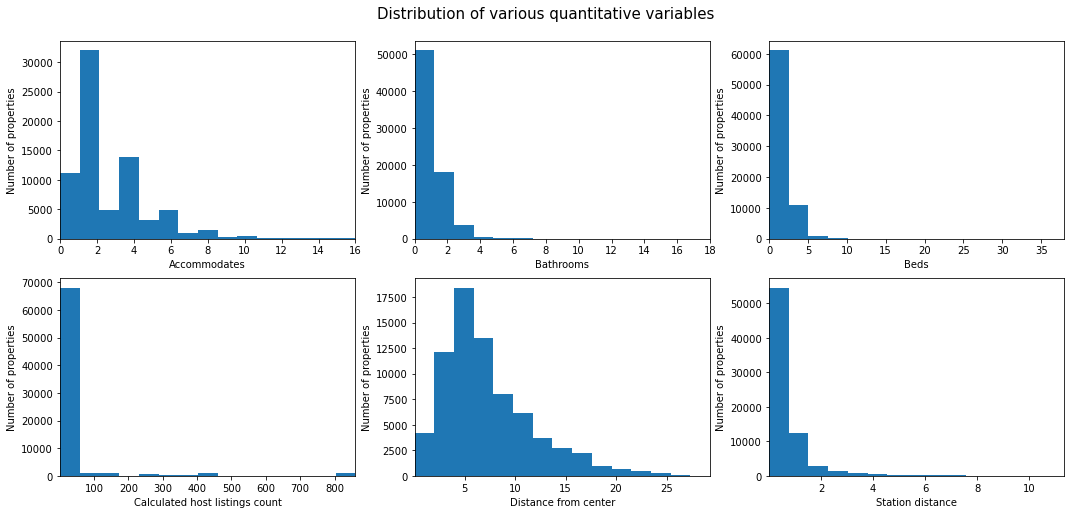

In [168]:
fig,ax = plt.subplots(2, 3, figsize=(18,8))

counter = 0

for r in range(2):
    for c in range(3):
        
        column = quantitative_variables[counter]
        title = column.replace('_',' ').capitalize()
        
        ax[r,c].hist(df[column], bins=15)
        
        ax[r,c].set_xlabel(title)
        ax[r,c].set_ylabel('Number of properties')
        ax[r,c].margins(x=0)
        
        counter += 1

plt.suptitle('Distribution of various quantitative variables', y=0.94, size=15)
plt.show()

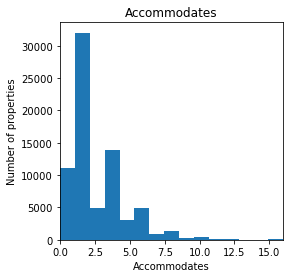

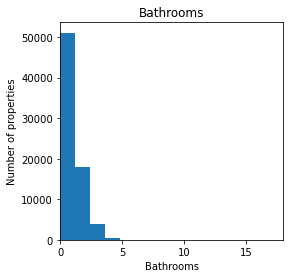

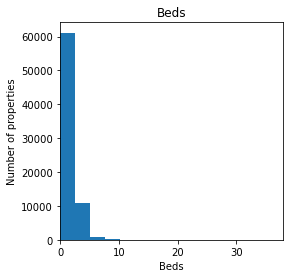

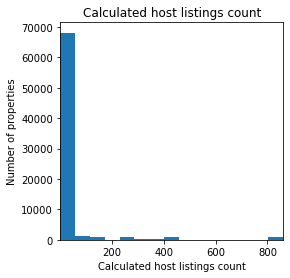

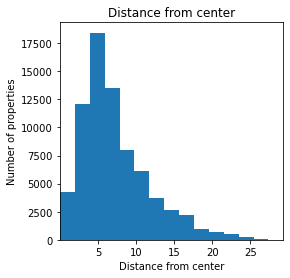

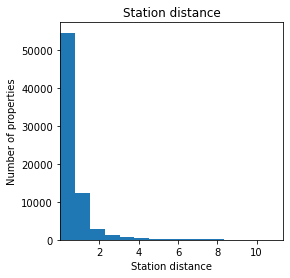

In [126]:
for variable in quantitative_variables:

    fig,ax = plt.subplots(figsize = (4,4))

    ax.hist(df[variable], bins = 15)
    ax.margins(x=0)
    
    title=variable.replace('_',' ').capitalize()

    ax.set_xlabel(title)
    ax.set_ylabel('Number of properties')

    ax.set_title(title)

    plt.show()

In [46]:
df_vis.price.mean()

105.94114279483125

In [47]:
df_vis.bedrooms.mean()

1.0153617578103702

In [49]:
df_vis.groupby('neighbourhood').count()['id'].sort_values(ascending=False)

neighbourhood
Westminster               8151
Tower Hamlets             6314
Hackney                   5478
Kensington and Chelsea    5156
Camden                    5110
Southwark                 4238
Islington                 4214
Lambeth                   4060
Wandsworth                3689
Hammersmith and Fulham    3310
Brent                     2136
Lewisham                  2058
Haringey                  2038
Newham                    1711
Ealing                    1645
Barnet                    1609
Greenwich                 1577
Waltham Forest            1320
Merton                    1208
Croydon                   1114
Richmond upon Thames      1042
Hounslow                  1034
Redbridge                  677
Hillingdon                 647
Enfield                    614
Bromley                    560
Kingston upon Thames       528
Harrow                     455
City of London             425
Barking and Dagenham       400
Sutton                     310
Bexley                   

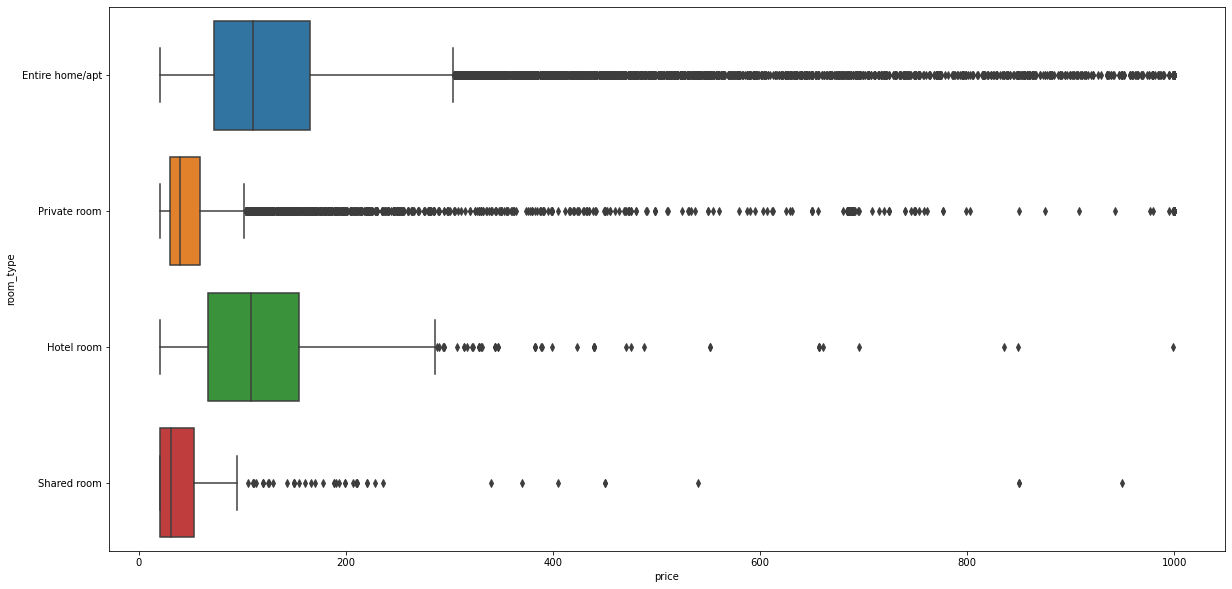

In [50]:
fig,ax = plt.subplots(figsize=(20,10))

sns.boxplot(x=df_vis.price,y=df_vis.room_type,ax=ax)

plt.show()

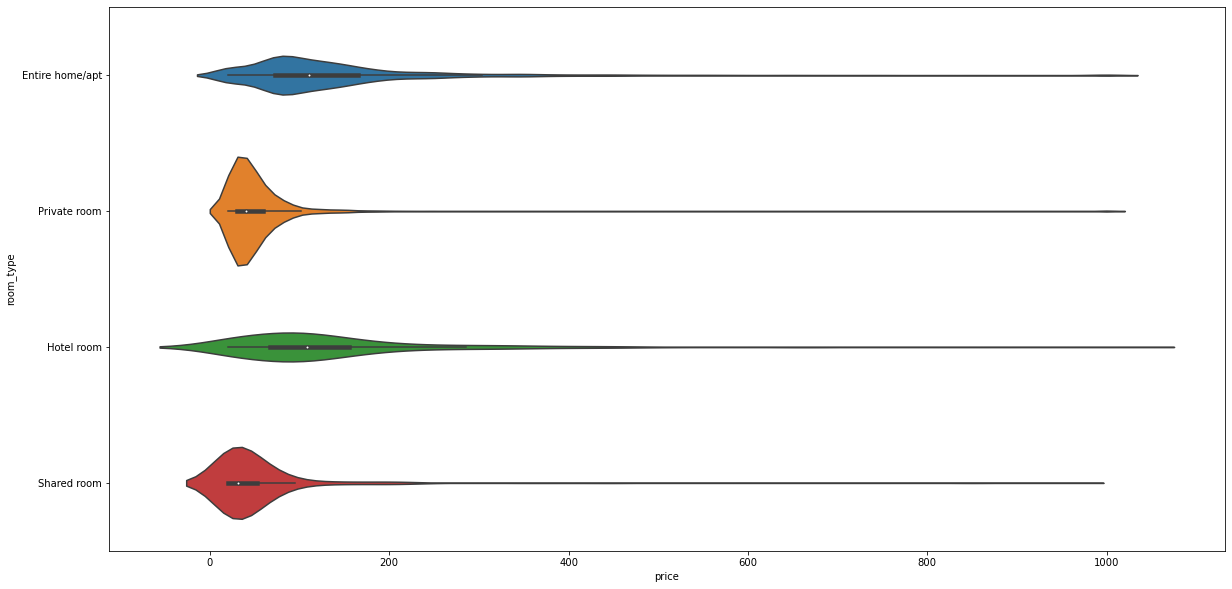

In [51]:
fig,ax = plt.subplots(figsize=(20,10))

sns.violinplot(x=df_vis.price,y=df_vis.room_type,ax=ax)

plt.show()

In [52]:
df_vis.dtypes[df_vis.dtypes!='object']

id                                  int64
host_id                             int64
host_is_superhost                   int64
host_has_profile_pic                int64
host_identity_verified              int64
latitude                          float64
longitude                         float64
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
price                             float64
instant_bookable                    int64
calculated_host_listings_count      int64
air_conditioning                    int64
bbq                                 int64
baby_facilities                     int64
balcony_or_patio                    int64
bath                                int64
bed_linen                           int64
cable_tv                            int64
child_friendly                      int64
coffee_maker                        int64
cooking_facilities                

In [56]:
variables_continuous = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'distance_from_center', 'station_distance',
                       'tfl_zone', 'mean_monthly_rent', 'name_length', 'description_length',
                       'neighborhood_overview_length', 'host_about_length']

In [58]:
mask = np.zeros_like(df_vis[variables_continuous+['price']].corr())

In [59]:
mask[np.triu_indices_from(mask)] = True

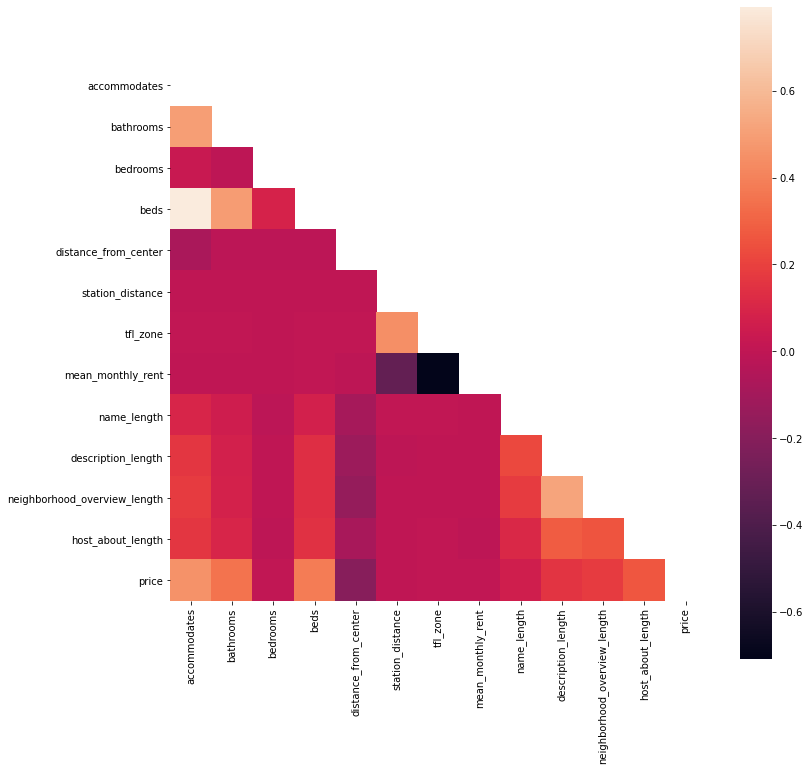

In [60]:
plt.figure(figsize=(12,12))


sns.heatmap(df_vis[variables_continuous+['price']].corr(), mask=mask,square=True)

plt.show()

Why are there such expensive private rooms on Airbnb?

Some of them must be priced as a joke!.....

e.g. https://www.airbnb.com/rooms/10475894

In [61]:
tfl_zones = list(df_vis.tfl_zone.unique())

tfl_zones.sort()

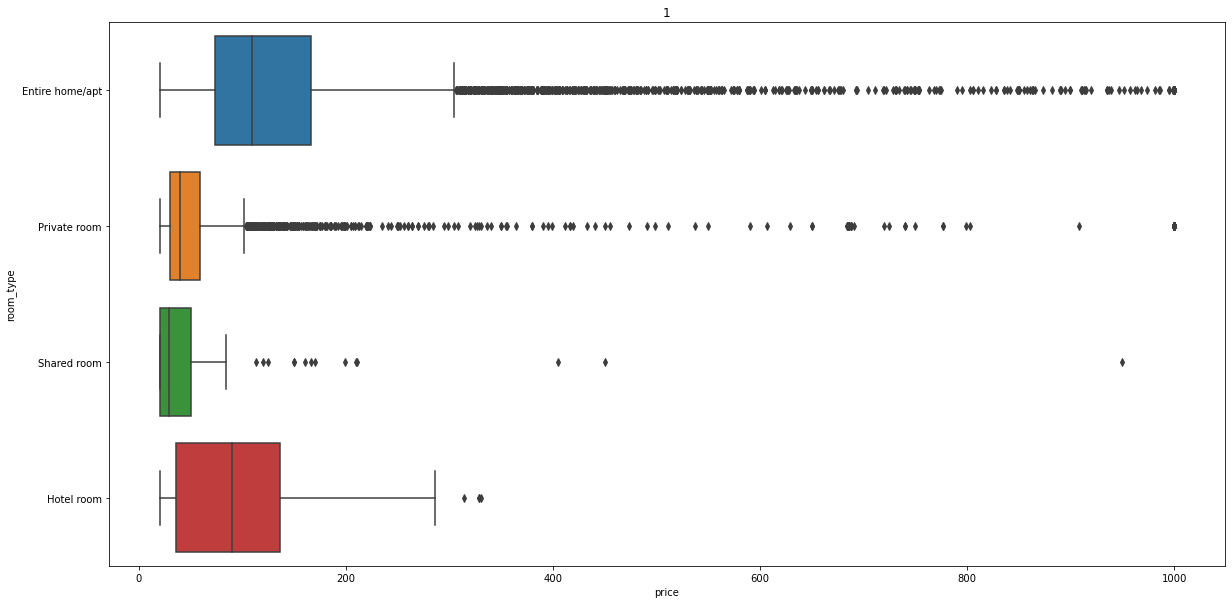

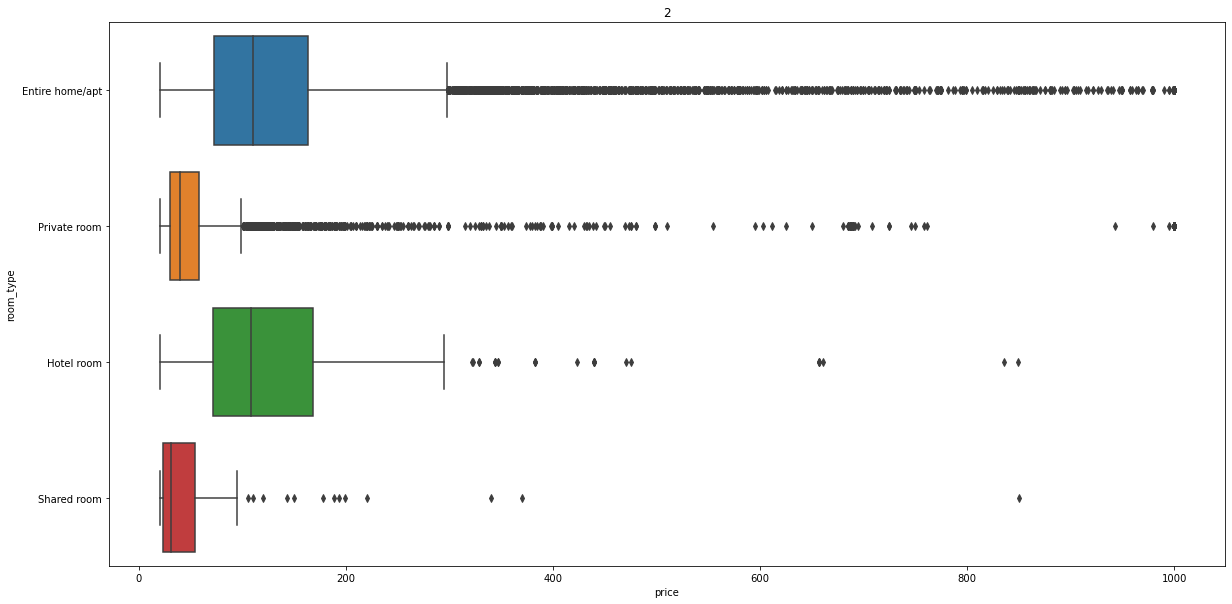

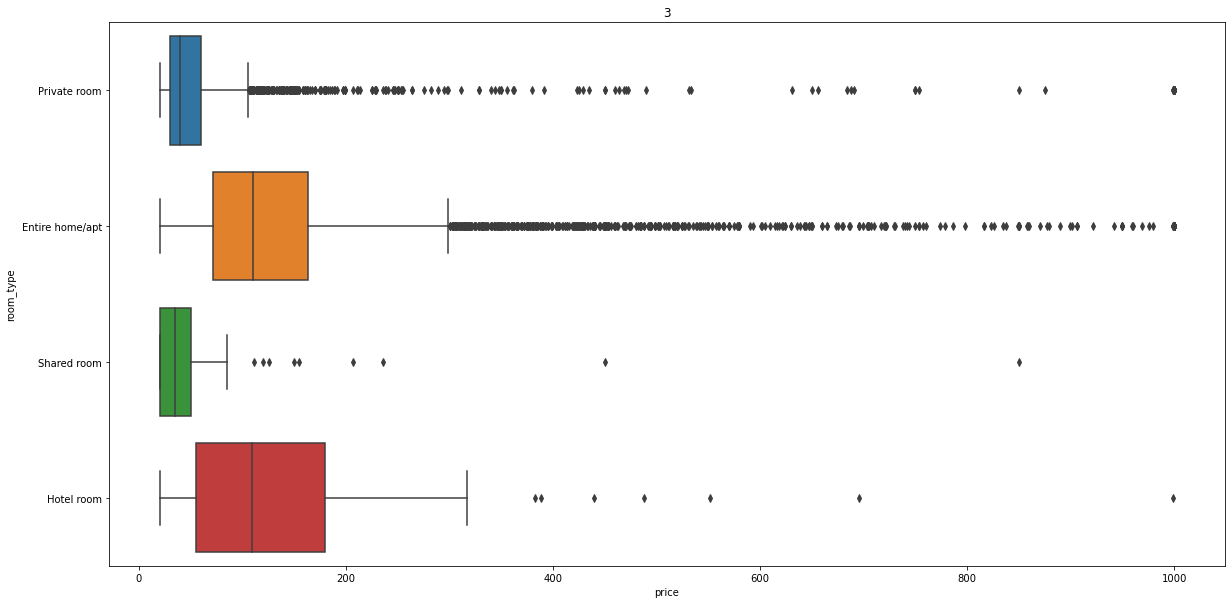

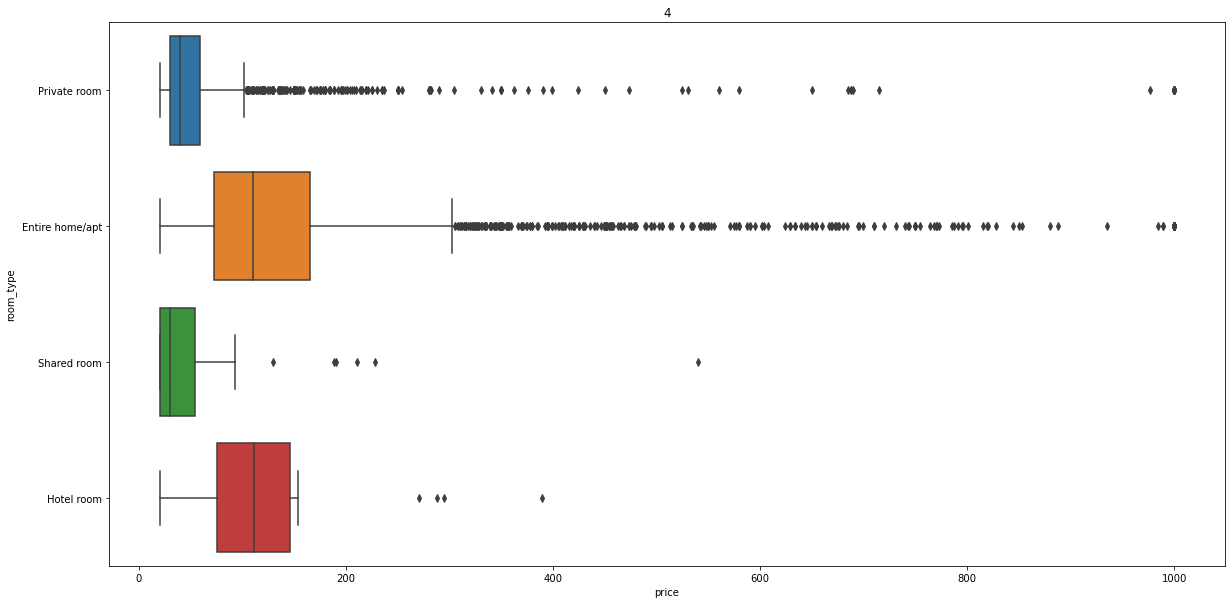

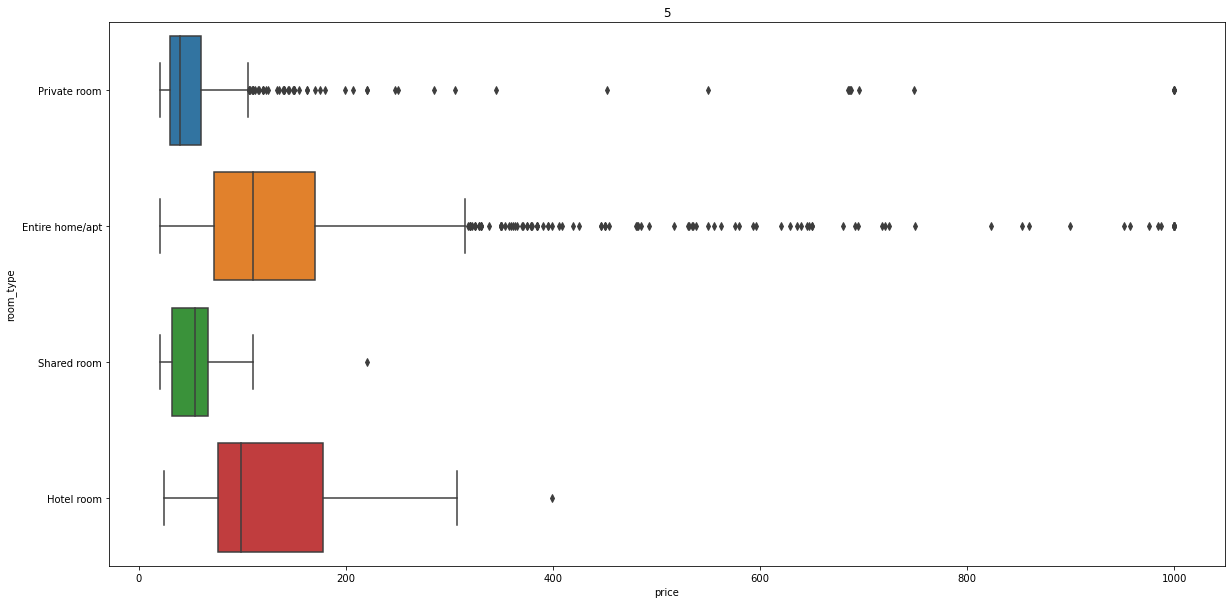

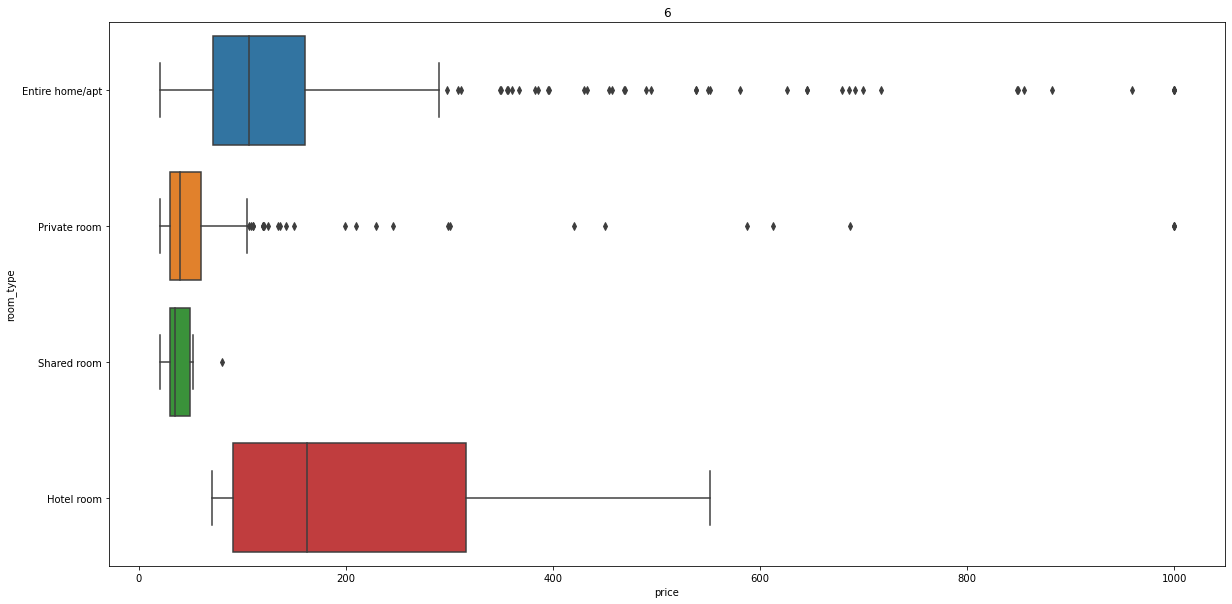

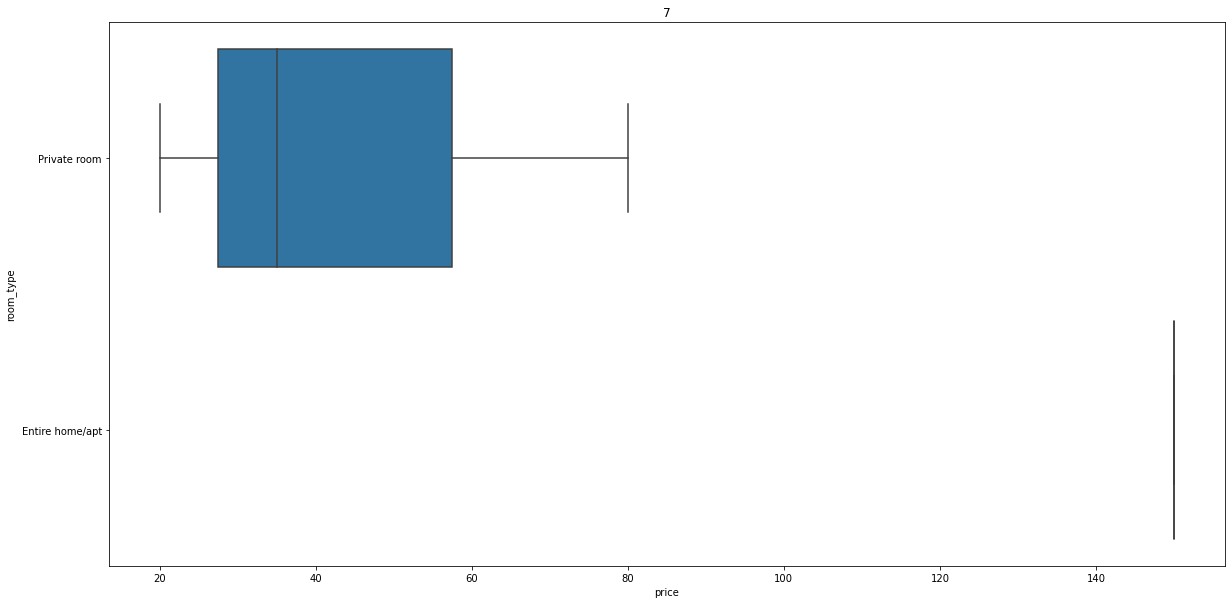

In [62]:
for zone in tfl_zones:
    
    df_vis_zone = df_vis[df_vis.tfl_zone==zone]
    
    fig,ax = plt.subplots(figsize=(20,10))
    sns.boxplot(x=df_vis_zone.price,y=df_vis_zone.room_type,ax=ax,)
    ax.set_title(zone)

plt.show()

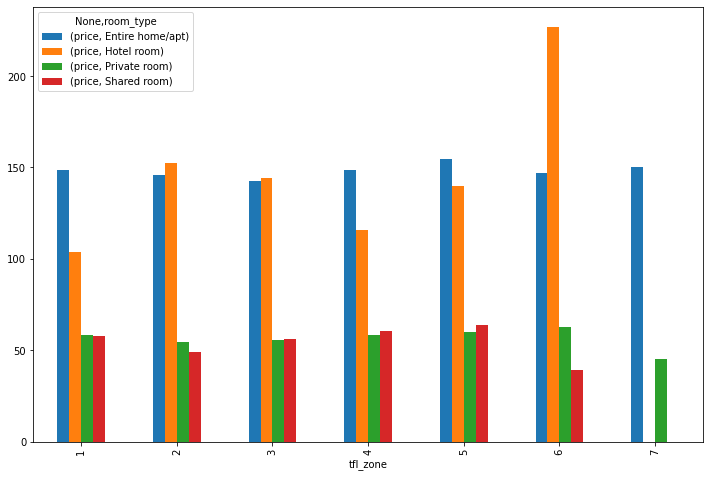

In [63]:
fig,ax = plt.subplots(figsize=(12,8))

df_vis.groupby(['tfl_zone','room_type']).mean()[['price']].unstack().plot.bar(ax=ax)

plt.show()

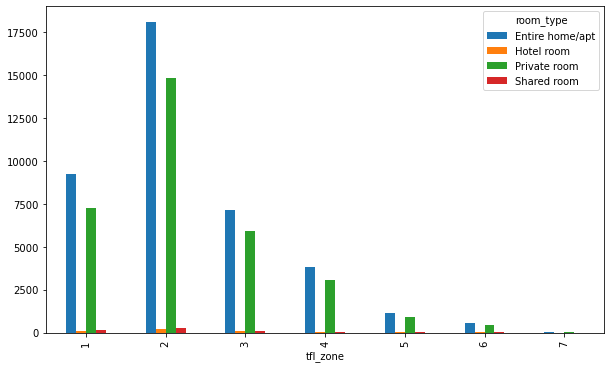

In [64]:
fig,ax=plt.subplots(figsize=(10,6))

df_vis.groupby(['tfl_zone','room_type']).count().listing_url.unstack().plot.bar(ax=ax)

plt.show()

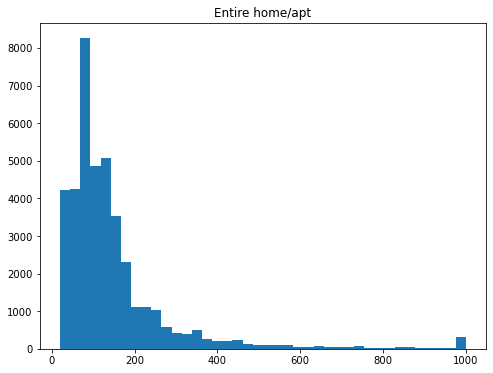

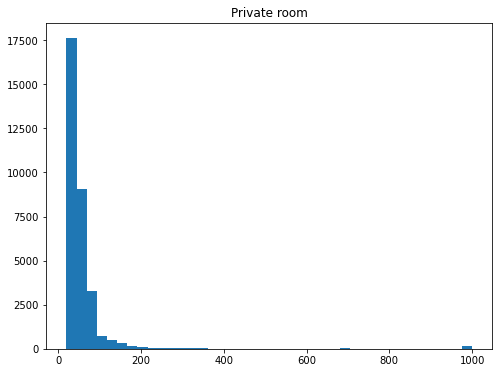

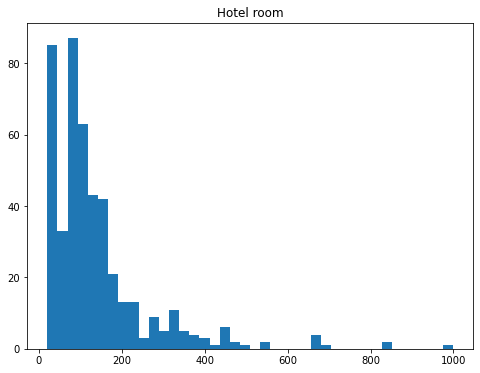

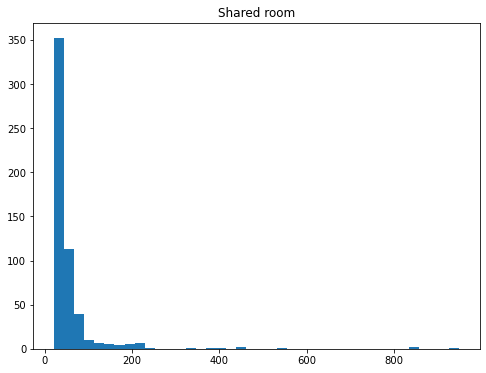

In [65]:
room_types = list(df_vis.room_type.unique())

for room in room_types:
    fig,ax = plt.subplots(figsize=(8,6))

    ax.hist(x=df_vis[df_vis.room_type==room].price, bins=40)
    ax.set_title(room)

plt.show()

## GeoPandas

In [66]:
import geopandas as gpd

In [67]:
map_df_vis = gpd.read_file('../data/neighbourhoods.geojson')
map_df_vis.head()

,neighbourhood,neighbourhood_group,geometry
0,Kingston upon Thames,None,"MULTIPOLYGON (((-0.33068 51.32901, -0.33059 51..."
1,Croydon,None,"MULTIPOLYGON (((-0.06402 51.31864, -0.06407 51..."
2,Bromley,None,"MULTIPOLYGON (((0.01213 51.29960, 0.01196 51.2..."
3,Hounslow,None,"MULTIPOLYGON (((-0.24456 51.48870, -0.24468 51..."
4,Ealing,None,"MULTIPOLYGON (((-0.41183 51.53408, -0.41188 51..."


In [68]:
# Dropping the empty column
map_df_vis.drop('neighbourhood_group', axis=1, inplace=True)

# Creating a dataframe of listing counts and median price by borough
neighbourhood_df_vis = pd.DataFrame(df_vis.groupby('neighbourhood').size())
neighbourhood_df_vis.rename(columns={0: 'number_of_listings'}, inplace=True)
neighbourhood_df_vis['mean_price'] = df_vis.groupby('neighbourhood').price.mean().values

# Joining the dataframes
neighbourhood_map_df_vis = map_df_vis.set_index('neighbourhood').join(neighbourhood_df_vis)

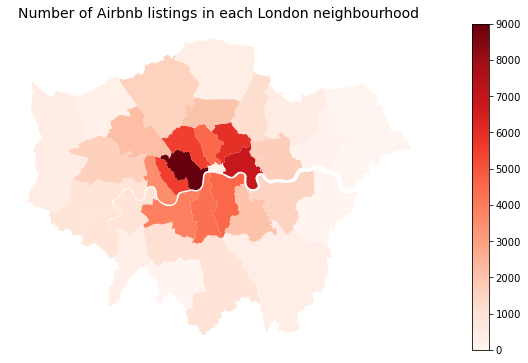

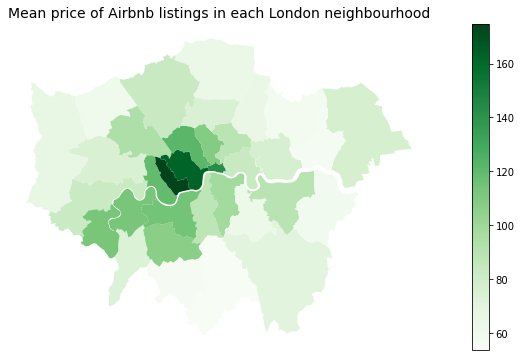

In [69]:
# Plotting the number of listings in each borough
fig1, ax1 = plt.subplots(1, figsize=(15, 6))
neighbourhood_map_df_vis.plot(column='number_of_listings', cmap='Reds', ax=ax1)
ax1.axis('off')
ax1.set_title('Number of Airbnb listings in each London neighbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=0, vmax=9000))
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)
plt.show()

# Plotting the mean price of listings in each borough
fig2, ax2 = plt.subplots(1, figsize=(15, 6))
neighbourhood_map_df_vis.plot(column='mean_price', cmap='Greens', ax=ax2)
ax2.axis('off')
ax2.set_title('Mean price of Airbnb listings in each London neighbourhood', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Greens', norm=plt.Normalize(vmin=min(neighbourhood_map_df_vis.mean_price), vmax=max(neighbourhood_map_df_vis.mean_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()

credit for the code above to https://github.com/L-Lewis/Airbnb-neural-network-price-prediction/blob/master/Airbnb-price-prediction.ipynb

### Pairplots

In [70]:
df_vis_corr = pd.DataFrame(df_vis.corr()['price'])

df_vis_corr['av_correlation'] = df_vis_corr.price.apply(lambda x: abs(x))

df_vis_corr.sort_values('av_correlation', ascending=False).head(50)

,price,av_correlation
price,1.000000,1.000000
accommodates,0.456849,0.456849
beds,0.380412,0.380412
calculated_host_listings_count,0.357780,0.357780
bathrooms,0.352746,0.352746
host_about_length,0.261553,0.261553
dishwasher,0.238346,0.238346
distance_from_center,-0.196195,0.196195
tv,0.188746,0.188746
neighborhood_overview_length,0.178647,0.178647


In [71]:
pairplot = df_vis[['beds', 'mean_monthly_rent', 'accommodates',
       'bathrooms', 'bedrooms','price', 'tfl_zone', 'room_type']].copy()

/Users/jamesradford/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


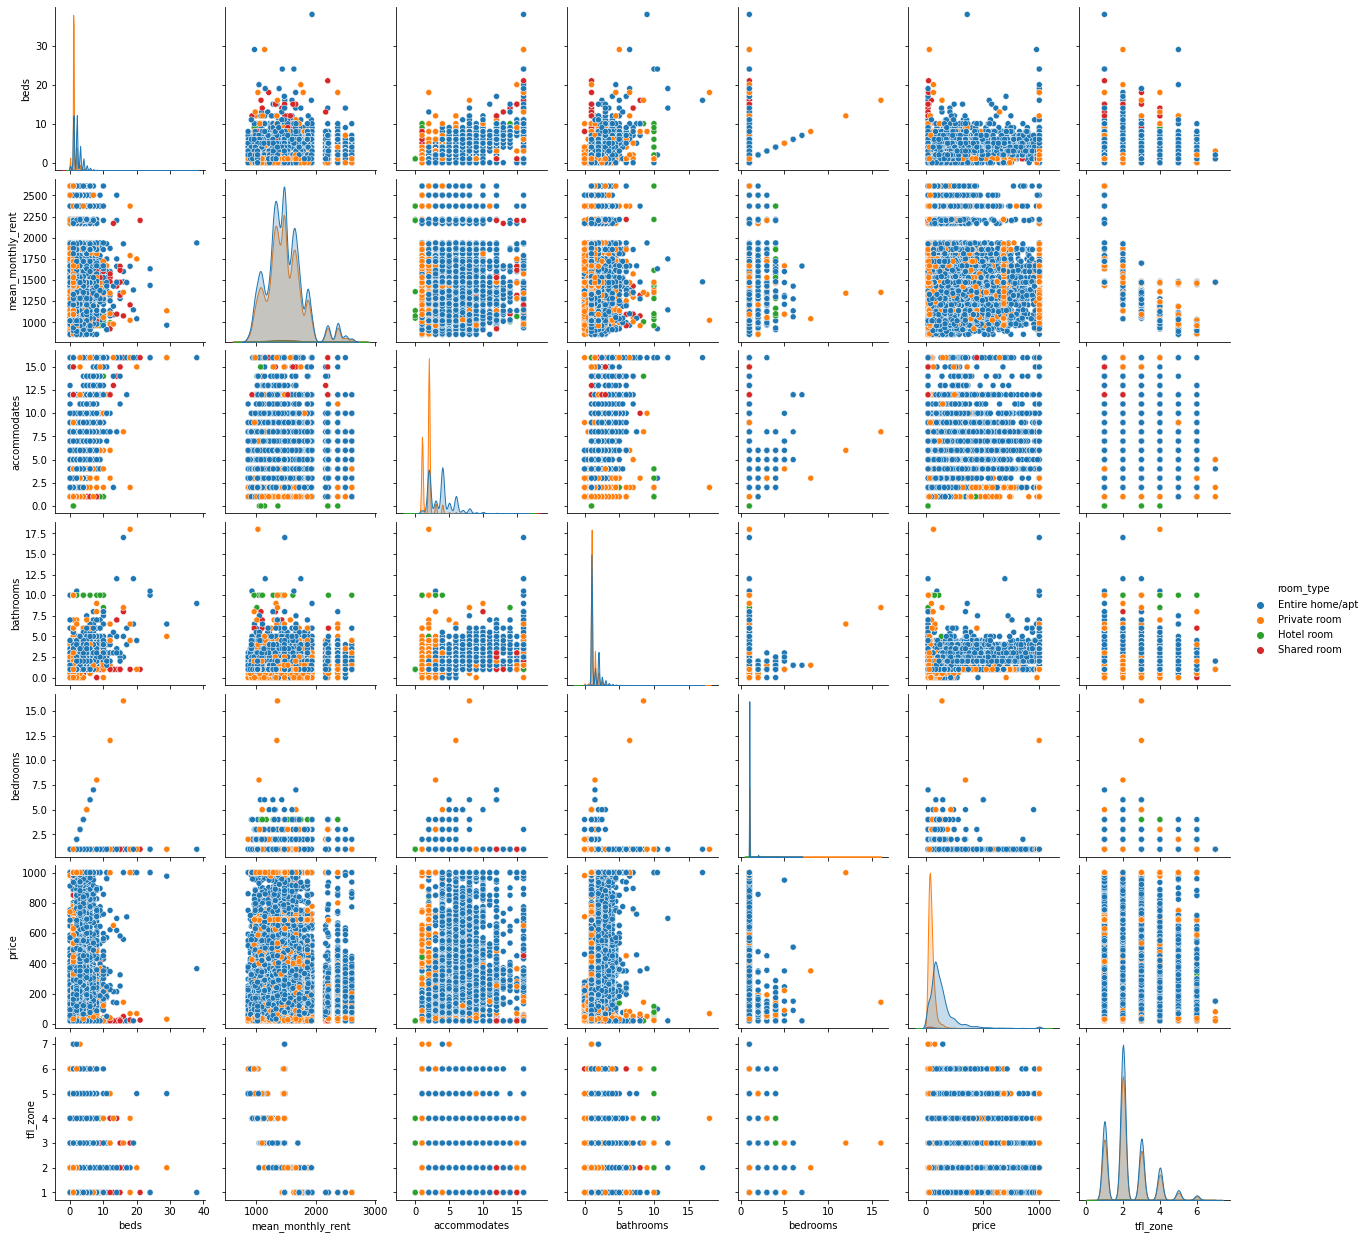

In [72]:
sns.pairplot(pairplot,hue='room_type')

plt.show()